In [1]:
import sys,os, pandas as pd,datetime
from pathlib import Path
project_root = os.path.abspath(Path("../."))
sys.path.append(str(project_root))
print(project_root)
from matplotlib import pyplot as plt
import seaborn as sns
from utils.EDA_utils import (
    prepare_dataframe,
    compute_summary_stats,
    run_adf_kpss,
)

g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis
g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis


In [2]:
# Find the latest processed data file
processed_data_dir = Path(project_root) / "data" / "processed"
processed_files = list(processed_data_dir.glob("gold_price_processed*.csv"))
if not processed_files:
    print("No raw data files found")

latest_file = max(processed_files, key=os.path.getctime)
print(f"Loading processed_file from {latest_file}")

Loading processed_file from g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\data\processed\gold_price_processed.csv


In [13]:
target_isClose=True
load_mt5_data=False
features_file = f"gold_price_features_{'Close' if target_isClose else 'LogReturn'}{'_mt5' if load_mt5_data else ''}.csv"
features_filepath=str(project_root) + f'/data/features/{features_file}'
df = pd.read_csv(features_filepath)
df.describe()


,Volume,day_of_month,year,day_sin,day_cos,day_of_year_norm,dayy_sin,dayy_cos,is_holiday,Log_Return,...,stddev_3_2_short,stddev_3_2_combined,stddev_5_2_long,stddev_5_2_short,stddev_5_2_combined,Open,High,Low,Close,target
count,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.0,4770.000000,...,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000
mean,5032.892662,15.736059,2015.005241,0.361400,-0.094012,0.503447,-0.003525,-0.009634,0.0,0.032922,...,-0.262893,-0.041929,0.216562,-0.262893,-0.046331,1385.877757,1392.959435,1378.445765,1385.783563,1386.651110
std,27062.100275,8.747509,5.469849,0.515746,0.771193,0.286071,0.711843,0.702413,0.0,1.127895,...,0.440251,0.694407,0.411945,0.440251,0.690947,443.834714,445.955126,441.807978,443.943356,444.328078
min,0.000000,1.000000,2006.000000,-0.433884,-0.900969,0.005476,-0.999999,-0.999979,0.0,-9.820579,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,538.000000,539.900024,535.500000,539.000000,539.000000
25%,38.000000,8.000000,2010.000000,0.000000,-0.900969,0.257358,-0.715795,-0.709761,0.0,-0.490934,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1148.974976,1156.175018,1138.824951,1148.475037,1150.174988
50%,139.000000,16.000000,2015.000000,0.433884,-0.222521,0.503765,-0.006451,-0.013976,0.0,0.045799,...,0.000000,0.000000,0.000000,0.000000,0.000000,1310.649963,1315.549988,1306.049988,1310.649963,1310.750000
75%,467.000000,23.000000,2020.000000,0.781831,0.623490,0.752225,0.711276,0.687457,0.0,0.626091,...,0.000000,0.000000,0.000000,0.000000,0.000000,1725.574982,1733.975006,1716.299988,1724.875031,1725.174957
max,386334.000000,31.000000,2024.000000,0.974928,1.000000,1.002053,0.999986,0.999991,0.0,8.643166,...,0.000000,1.000000,1.000000,0.000000,1.000000,2787.399902,2789.000000,2774.600098,2788.500000,2788.500000


### 4.5.1	Descriptive Statistics

In [ ]:
df  = prepare_dataframe(df)
compute_summary_stats(df)

Summary statistics saved -> g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\results\EDA


,Open,High,Low,Close,Volume,LogReturn
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,1386.053282,1393.136444,1378.619732,1385.959068,5033.947997,0.000328
std,443.715651,445.834271,441.690883,443.824382,27064.839850,0.011280
min,538.000000,539.900024,535.500000,539.000000,0.000000,-0.098206
25%,1149.800049,1157.000000,1139.199951,1149.000000,38.000000,-0.004914
50%,1310.699951,1315.599976,1306.099976,1310.699951,139.000000,0.000457
75%,1725.599976,1734.000000,1716.500000,1724.900024,467.000000,0.006258
max,2787.399902,2789.000000,2774.600098,2788.500000,386334.000000,0.086432
skew,0.333501,0.332827,0.336467,0.334583,7.145829,-0.339432
kurtosis,0.054548,0.051481,0.056359,0.054844,56.768517,5.436482


### 4.5.2	Univariate Distribution Analysis of Prices & Log Returns

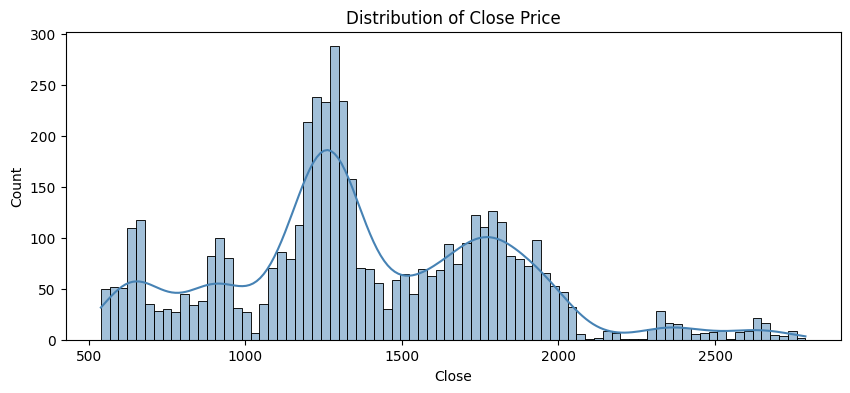

In [5]:
plt.figure(figsize=(10,4))
sns.histplot(df['Close'], bins=80, kde=True, color='steelblue')
plt.title("Distribution of Close Price")
plt.show()

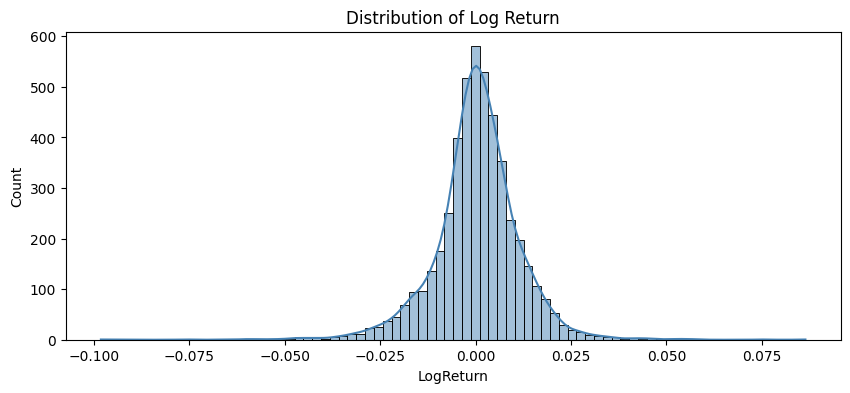

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(df['LogReturn'], bins=80, kde=True, color='steelblue')
plt.title("Distribution of Log Return")
plt.show()

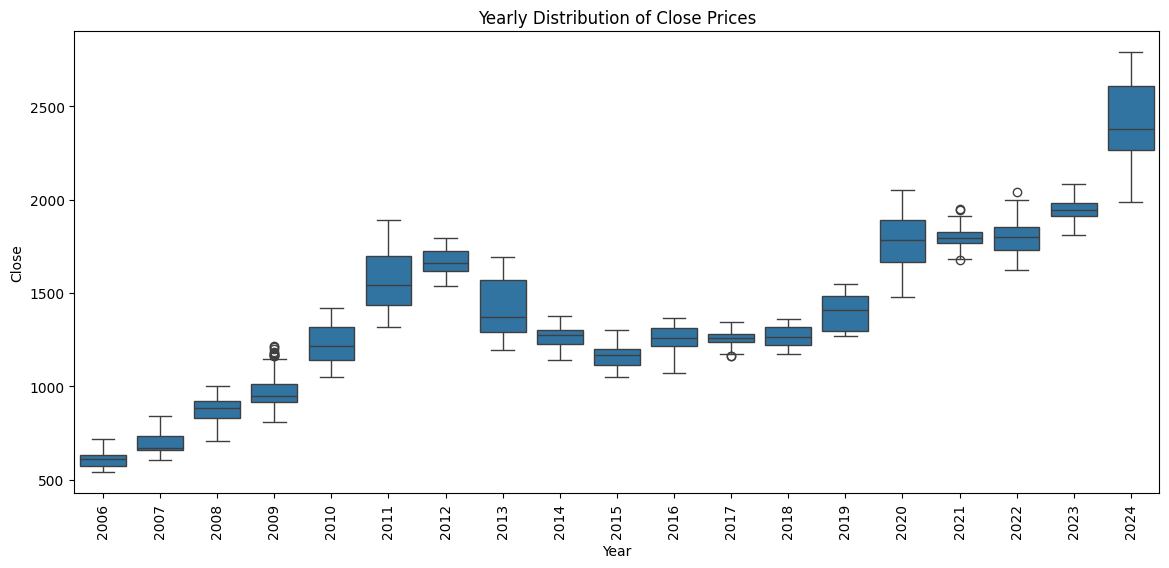

In [7]:

df['Year'] = df.index.year

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Year', y='Close')
plt.xticks(rotation=90)
plt.title("Yearly Distribution of Close Prices")
plt.show()


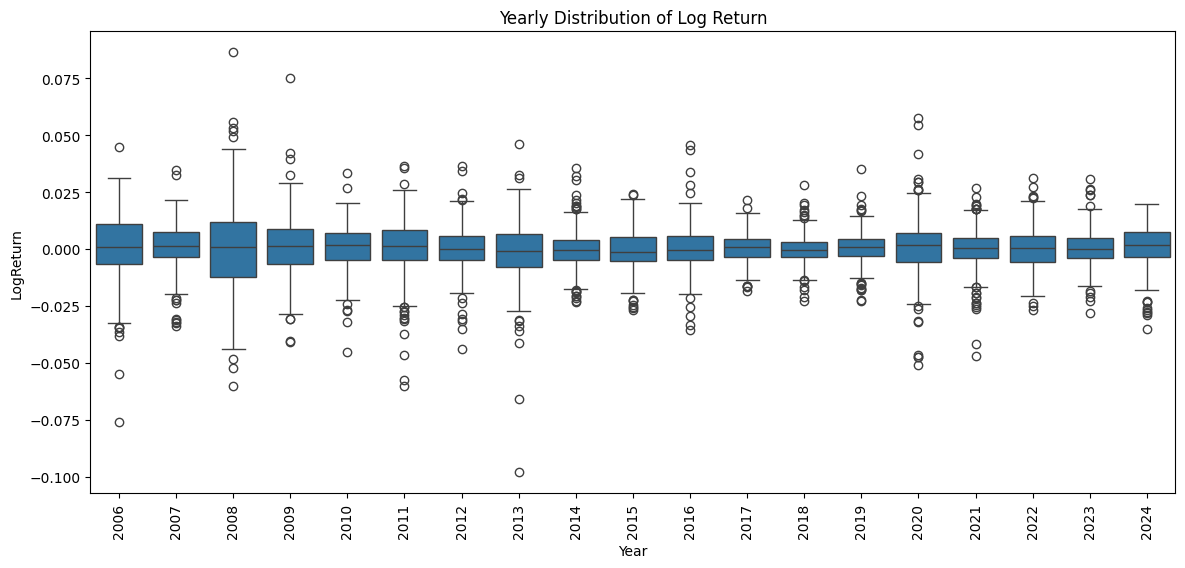

In [8]:
df['Year'] = df.index.year

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Year', y='LogReturn')
plt.xticks(rotation=90)
plt.title("Yearly Distribution of Log Return")
plt.show()

### 4.5.3	Autocorrelation and Partial Autocorrelation Analysis

<Figure size 1200x500 with 0 Axes>

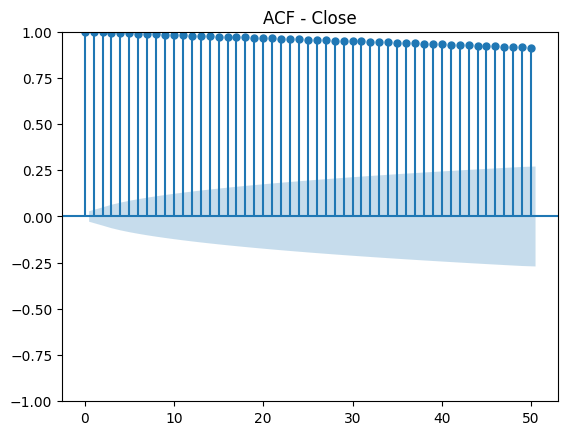

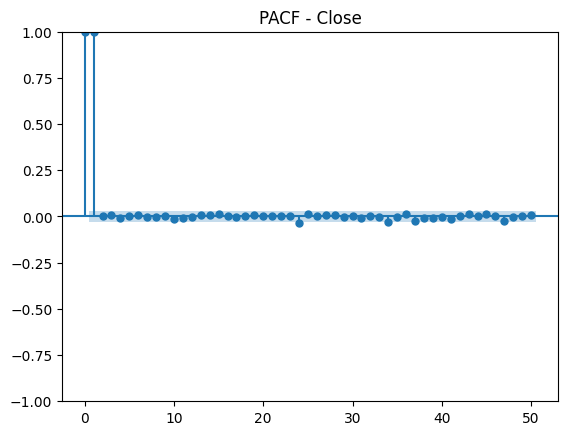

<Figure size 1200x500 with 0 Axes>

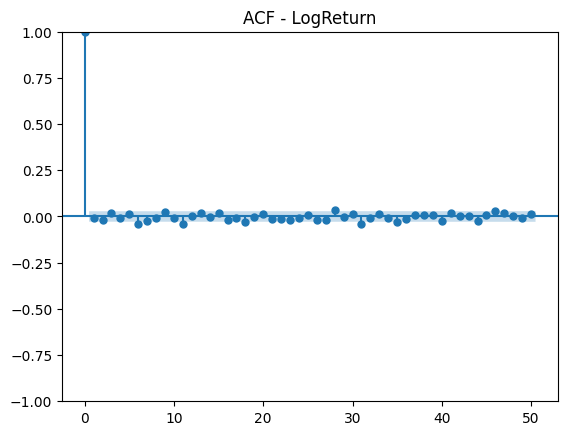

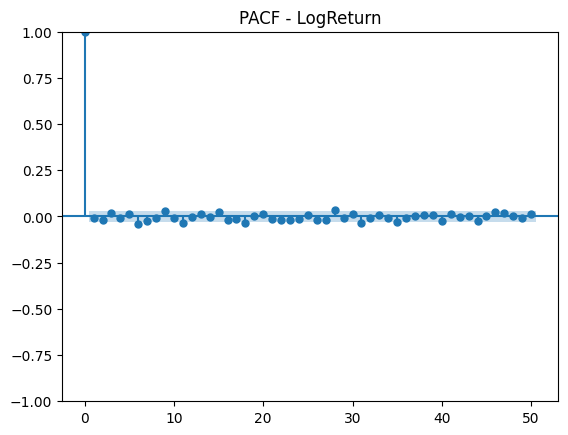

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lags = 50

plt.figure(figsize=(12,5))
plot_acf(df['Close'], lags=lags)
plt.title(f"ACF - Close")
plt.show()

plot_pacf(df['Close'], lags=lags)
plt.title(f"PACF - Close")
plt.show()

plt.figure(figsize=(12,5))
plot_acf(df['LogReturn'], lags=lags)
plt.title(f"ACF - LogReturn")
plt.show()

plot_pacf(df['LogReturn'], lags=lags)
plt.title(f"PACF - LogReturn")
plt.show()

### 4.5.4	Stationarity Tests (ADF, KPSS)

In [10]:
run_adf_kpss(df)

Stationarity results saved -> g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\results\EDA /tables/stationarity_results.csv


g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\utils\EDA_utils.py:94: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(series, regression=regression, nlags="auto")
g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\utils\EDA_utils.py:94: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, lags, crit = kpss(series, regression=regression, nlags="auto")


{'Close_ADF': {'adf_stat': -1.222838616732546,
  'p_value': 0.9057175353654943,
  'n_lags': 11,
  'n_obs': 4757,
  'crit_1%': -3.9606743687121626,
  'crit_5%': -3.4114133343539255,
  'crit_10%': -3.1275937094994424},
 'Close_KPSS': {'kpss_stat': 1.015658498451963,
  'p_value': 0.01,
  'n_lags': 42,
  'crit_10%': 0.119,
  'crit_5%': 0.146,
  'crit_1%': 0.216},
 'LogReturn_ADF': {'adf_stat': -22.045082039973337,
  'p_value': 0.0,
  'n_lags': 10,
  'n_obs': 4758,
  'crit_1%': -3.43172512220716,
  'crit_5%': -2.862147648515838,
  'crit_10%': -2.567093453210195},
 'LogReturn_KPSS': {'kpss_stat': 0.13063693467640888,
  'p_value': 0.1,
  'n_lags': 11,
  'crit_10%': 0.347,
  'crit_5%': 0.463,
  'crit_1%': 0.739}}

### 4.5.5	Correlation Analysis

In [12]:
numeric_cols = ['Open','High','Low','Close','Volume','LogReturn']
corr = df[numeric_cols].corr()
corr

,Open,High,Low,Close,Volume,LogReturn
Open,1.000000,0.999795,0.999712,0.999566,0.002340,-0.011170
High,0.999795,1.000000,0.999615,0.999757,0.000856,-0.000666
Low,0.999712,0.999615,1.000000,0.999814,0.003460,0.002753
Close,0.999566,0.999757,0.999814,1.000000,0.001949,0.012237
Volume,0.002340,0.000856,0.003460,0.001949,1.000000,-0.023290
LogReturn,-0.011170,-0.000666,0.002753,0.012237,-0.023290,1.000000
